# Advanced Topic Presentation - Bokeh

Team 4
- Shoumik Reddy Kumbham
- Samragyee Pandey
- Rohith Sai Kanchi

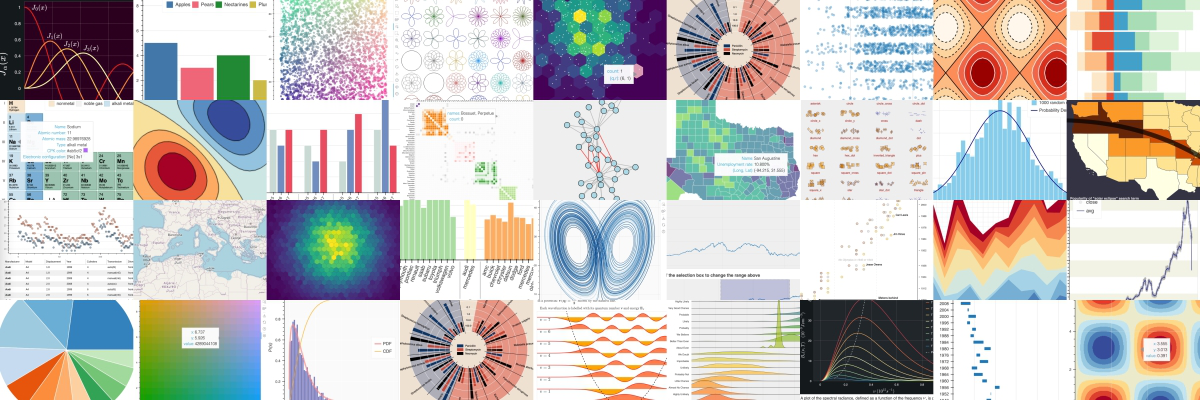

# What is Bokeh?

- Bokeh is an interactive visualization library for modern web browsers.
- It provides elegant and versatile graphics.
- It's well-suited for creating complex plots in a simple and intuitive manner.

# Where Bokeh Shines:
- **Interactive Web-based Visualizations**: Zoom, pan, click, or select visuals for more detailed views
- **Real-time Data Streaming**: Visualizing live data feeds, like financial tickers or sensor data.
- **Ease of Use**: Bokeh's syntax is relatively straightforward from simple line plots to complex dashboards with multiple interlinked visualizations.
- **Customization and Flexibility**: Allowing users to tweak almost every element of a plot to their needs.

# Installing Bokeh

In [ ]:
!pip install bokeh


- If pip indicates "Bokeh is already satisfied", it means Bokeh is already installed in the current Python environment.
- To verify the installation and check the installed version of Bokeh, the following code can be used:

In [ ]:
!bokeh info

Python version      :  3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
IPython version     :  7.34.0
Tornado version     :  6.3.2
Bokeh version       :  3.3.0
BokehJS static path :  /usr/local/lib/python3.10/dist-packages/bokeh/server/static
node.js version     :  v14.16.0
npm version         :  6.14.8
Operating system    :  Linux-5.15.120+-x86_64-with-glibc2.35


In [ ]:
from bokeh.io import output_notebook

output_notebook()

#Required Dependencies:

For basic usage, Bokeh requires the following libraries:

Jinja2 >=2.9

contourpy >=1

numpy >=1.16

packaging >=16.8

pandas >=1.2

pillow >=7.1.0

PyYAML >=3.10

tornado >=5.1

xyzservices >=2021.09.1


In [ ]:
# Importing the necessary modules from Bokeh
from bokeh.palettes import HighContrast3  # Palette with high contrast colors for the chart
from bokeh.plotting import figure, show  # figure for creating the plot, show for displaying it

# Data preparation
fruits = ["Apples", "Pears", "Nectarines", "Plums", "Grapes", "Strawberries"]  # Categories for the x-axis
years = ["2015", "2016", "2017"]  # Stack categories representing each year

# Constructing a dictionary to hold the data for plotting
data = {
    "fruits": fruits,
    "2015": [2, 1, 4, 3, 2, 4],  # Data for 2015
    "2016": [5, 3, 4, 2, 4, 6],  # Data for 2016
    "2017": [3, 2, 4, 4, 5, 3]   # Data for 2017
}

# Creating a figure object with various parameters for layout and interactivity
p = figure(x_range=fruits, height=250, title="Fruit Counts by Year",
           toolbar_location=None, tools="hover", tooltips="$name @fruits: @$name")

# Adding a vertical stacked bar chart to the figure
# This stacks data for each year on top of each other in the bar chart
p.vbar_stack(years, x="fruits", width=0.9, color=HighContrast3, source=data, legend_label=years)

# Setting the starting point of y-axis to 0 to have bars grow upwards
p.y_range.start = 0

# Adding padding to the x-range for aesthetics
p.x_range.range_padding = 0.1

# Disabling the grid lines for the x-axis for a cleaner look
p.xgrid.grid_line_color = None

# Disabling minor tick lines for a cleaner look
p.axis.minor_tick_line_color = None

# Removing the outline line color for a cleaner look
p.outline_line_color = None

# Setting the legend location to the top left of the chart
# and setting its orientation to horizontal for better readability
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

# Displaying the figure in the notebook or browser
show(p)


In [ ]:
# Importing necessary libraries
import pandas as pd
from bokeh.layouts import column
from bokeh.plotting import figure, output_file, show

# Reading the TVTODAY stock data into a pandas DataFrame, parsing the 'Date' column as a datetime object
TVTODAY = pd.read_csv("/content/TVTODAY.csv", parse_dates=['Date'])

# Creating a Bokeh figure with a datetime x-axis to plot the TVTODAY stock prices
p = figure(width=600, height=200, x_axis_type="datetime", title="TVTODAY 1-Yr Price Series")
# Plotting the closing prices as a line chart with a semi-transparent navy line
p.line(TVTODAY['Date'], TVTODAY['Close'], color='navy', alpha=0.5)

# Reading the NIFTY index data into a pandas DataFrame, similarly parsing the 'Date' column
NIFTY = pd.read_csv("/content/1Yr-NIFTY.csv", parse_dates=['Date'])

# Creating another Bokeh figure for the NIFTY index data with a datetime x-axis
n = figure(width=600, height=200, x_axis_type="datetime", title="NIFTY 1-Yr Series")
# Plotting the closing prices of the NIFTY index as a line chart with a semi-transparent red line
n.line(NIFTY['Date'], NIFTY['Close'], color='red', alpha=0.5)

# Defining the output file to save the visualization as an HTML document
output_file("TVTODAY.html")

# Displaying the two figures in a single column layout, with the height scaling to the contents of the browser window
show(column(n, p, sizing_mode="scale_height"))

# Note: By default, Bokeh figures come with pan and zoom tools enabled. Users can pan the plot by clicking and dragging,
# and can zoom in and out using the mouse wheel or by pinching on touch devices.


In [ ]:
import random
from bokeh.driving import count
from bokeh.models import ColumnDataSource
from bokeh.plotting import curdoc, figure

update_interval = 100
roll_over = 100

source = ColumnDataSource({'x':[], 'y':[]})

@count()
def update(x):
    y = random.random()
    source.stream({'x':[x], 'y':[y]}, rollover = roll_over)

plot = figure()
plot.line(x='x', y='y', source=source)
plot.xaxis.axis_label = 'Time'
plot.yaxis.axis_label = 'Random Number'

curdoc().add_root(plot)
curdoc().add_periodic_callback(update, update_interval)


In [ ]:
!pip install pandas_bokeh


In [ ]:
import numpy as np
import pandas as pd
import pandas_bokeh
pandas_bokeh.output_notebook()
pd.set_option('plotting.backend', 'pandas_bokeh')
from bokeh.models.widgets import DataTable, TableColumn
from bokeh.models import ColumnDataSource

df = pd.read_csv('/content/dataset_tk.csv')
df_long = pd.read_csv('/content/long_data_.csv')

df["Date"]=df["Unnamed: 0"]
df['Date'] = pd.to_datetime(df.Date, dayfirst=True)
df = df.drop(["Unnamed: 0"], axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Punjab             503 non-null    float64       
 1   Haryana            503 non-null    float64       
 2   Rajasthan          503 non-null    float64       
 3   Delhi              503 non-null    float64       
 4   UP                 503 non-null    float64       
 5   Uttarakhand        503 non-null    float64       
 6   HP                 503 non-null    float64       
 7   J&K                503 non-null    float64       
 8   Chandigarh         503 non-null    float64       
 9   Chhattisgarh       503 non-null    float64       
 10  Gujarat            503 non-null    float64       
 11  MP                 503 non-null    float64       
 12  Maharashtra        503 non-null    float64       
 13  Goa                503 non-null    float64       
 14  DNH       

In [ ]:
df['NR'] = df['Punjab']+ df['Haryana']+ df['Rajasthan']+ df['Delhi']+df['UP']+df['Uttarakhand']+df['HP']+df['J&K']+df['Chandigarh']
df['WR'] = df['Chhattisgarh']+df['Gujarat']+df['MP']+df['Maharashtra']+df['Goa']+df['DNH']
df['SR'] = df['Andhra Pradesh']+df['Telangana']+df['Karnataka']+df['Kerala']+df['Tamil Nadu']+df['Pondy']
df['ER'] = df['Bihar']+df['Jharkhand']+ df['Odisha']+df['West Bengal']+df['Sikkim']
df['NER'] =df['Arunachal Pradesh']+df['Assam']+df['Manipur']+df['Meghalaya']+df['Mizoram']+df['Nagaland']+df['Tripura']

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool

# Prepare your data
source = ColumnDataSource(df_line)

# Create the plot
p = figure(title="India - Power Consumption Regionwise",
           x_axis_label="Date", y_axis_label="MU (millions of units)",
           width=1000, height=800, x_axis_type="datetime")

# Define colors for each line
colors = ["blue", "green", "red", "orange", "purple"]

# Define the regions
regions = ["Northern Region", "Southern Region", "Eastern Region", "Western Region", "North Eastern Region"]

# Add lines for each region with different colors and add hover tool
for region, color in zip(regions, colors):
    line = p.line(x='Date', y=region, source=source, line_width=2, color=color, legend_label=region)

    # Add hover tool for each line
    p.add_tools(HoverTool(renderers=[line], tooltips=[("Region", region), ("Date", "@Date{%F}")], formatters={'@Date': 'datetime'}))

# Customize the legend
p.legend.title = 'Regions'
p.legend.location = "top_left"

# Output and show the plot
output_notebook()
show(p)


# Comparison with Other Libraries like Matplotlib, Plotly, and Seaborn
- **Matplotlib** is more focused on static, publication-quality figures and lacks the interactive capabilities of Bokeh.

- **Seaborn** excels in statistical data visualization but doesn't support interactive web plots.

- **Plotly** is similar to Bokeh in interactivity and web integration but has a different syntax and approach, often considered more intuitive for users familiar with web development. Plotly supports real-time data through Plotly Dash, which is a separate framework for building interactive web applications.

In summary, Bokeh's combination of powerful interactivity, ease of use, real-time data capabilities, and web-focused output sets it apart from other Python visualization tools. These features make it a preferred choice for web-based data applications and dynamic data visualizations.

# Plotly vs Bokeh with Real time Data

Plotly (with Dash) is well-suited for users looking for a library that is both user-friendly and capable of creating sophisticated real-time interactive web applications. Its integration with Dash makes it a strong choice for creating analytics dashboards with real-time capabilities.

Bokeh is more suited for users who need to build highly customized, performant visualizations for streaming large datasets. Bokeh's server provides the mechanisms to update visualizations efficiently with new data as it comes in, making it ideal for real-time streaming applications.